In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_context('talk')
except ModuleNotFoundError:
    print('Dont worry')

 Setup plotting, seaborn is just used to make figures look a bit nicer not required

In [42]:
from pyphotonics.photoluminescence import Photoluminescence
import os
import numpy as np
import subprocess
import glob
import os
import shutil

<font size="4"> <b>System </b>: We are using a monolayer hBN system with a 7x7x1 super cell.
<br>

<font size="4">The defect state considered is a carbon substitutional defect at Boron site and a  adjacent nitrogen vacancy. <br>

<font size="4"> <b>Work flow:</b>
- <font size="4">Create the defected geomerty, and relax it. This is our Ground state geomerty.
- <font size="4">Model phonons corresponding to the ground state geomerty.
- <font size="4">Model the excited state geomerty using constraint DFT and relax it.  This is our excited state state geomerty.

<font size="4">Lets view these below using ase

In [46]:
from ase.io import read, write
from ase.visualize import view
from ase_notebook import AseView, ViewConfig, get_example_atoms

config = ViewConfig()
ase_view = AseView(config)
PP=read('SPOSCAR_pristine_hBN')
ES=read('CONTCAR_ES')
GS=read('CONTCAR_GS')

ase_view.config.atom_show_label = True
ase_view.config.canvas_background_opacity = 0.9
ase_view.config.atom_lighten_by_depth = 0.2

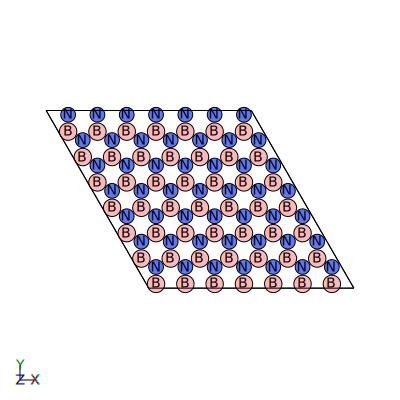

In [47]:
svg = ase_view.make_svg(PP, center_in_uc=True)
svg

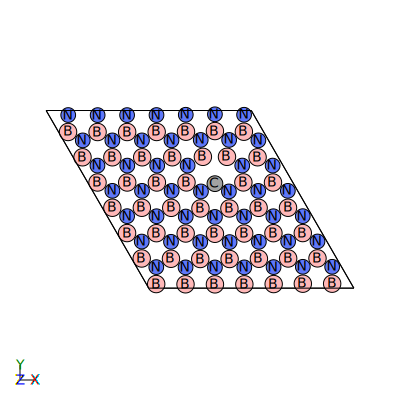

In [48]:
svg = ase_view.make_svg(GS, center_in_uc=True)
svg

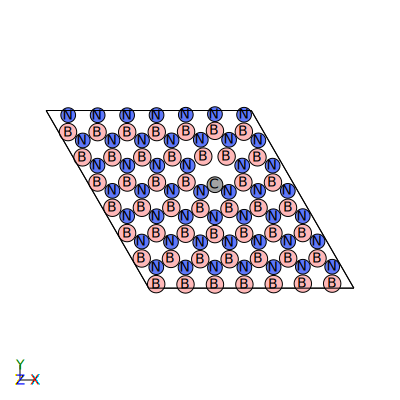

In [49]:
svg = ase_view.make_svg(ES, center_in_uc=True)
svg

<span style="color:blue"><font size="4">  <b>Theory:</b> (Reproduced from Computer Physics Communications 273 (2022) 108222)
 
 
<font size="4"> <b>Assumption 1.</b> The Born-Oppenheimer approximation (BOA): the dynamics of the electronic wavefunctions is too rapid compared with that of the nuclear wavefunctions, and therefore we can decompose the vibronic wavefunction into an electronic and an ionic component.

<font size="4"> <b>Assumption 2.</b>  The Condon and the Franck-Condon principles: according to the Condon principle, the transition dipole moment is independent from the positions of nuclei, and according to the Franck-Condon principle, the electronic transitions occur without changes in the positions of the nuclei


<font size="4"><b>Assumption 3.</b>  The configuration coordinates: The multi-dimensional harmonic oscillators which depend on 3N coordinates can be approximated as a single harmonic oscillator that depends on a single coordinate Q , known as the configuration coordinate (CC). In terms of Q , and for a single mode of vibration, the potential energy of the mode is 
\begin{equation*}
V_g = \frac{1}{2} M_c \omega_c^2 Q^2
\end{equation*}

<font size="4"> <b>Assumption 4.</b>  The vibrational modes are linearly coupled to the defect. The the Huang-Rhys factors are calculated as
\begin{equation*}
S_i= \frac {\omega_i q^2}{2\hbar}
\end{equation*}
 and the total HR factor is just the summation over all the modes.
\begin{equation*}
S = \sum_{i}^{M} S_i
\end{equation*}

<font size="4"> The quantities $\omega_i$ and $q_i$ correspond to the phonon energy and the vibrational displacement, and $q_i$  is defined as:
\begin{equation*}
q_i = \sum_{aj}^{NM} m_{a}^{1/2} (R_{e, aj} - R_{g,aj})\Delta r_{i,aj}
\end{equation*}

<font size="4"> We are using pypohotonics for these: https://github.com/sheriftawfikabbas/pyphotonics

<!-- mesaure of the extent of atomic structure change due to the excitation is calculated by the quantity $\Delta Q$, which is defined as:
 
 
\begin{equation*}
\Delta Q ^2 = \sum_{ai} m_{a}^{1/2} (R_{e, ai} - R_{g,ai})
\end{equation*}

where $a$ enumerates the atoms, $i = x, y, z$, $m_a$ is the atomic mass of species a, $R_{g/e,ai}$ is the position of atom a in the ground/excited state, respectively. -->
 </font>

In [57]:
# Phonon calculations with finite displacements
subprocess.call('phonopy -d --dim=\"1 1 1\" -c CONTCAR_GS', shell=True)
#os.makedirs('phonopy')
subprocess.call('mv POSCAR-* phonopy', shell=True)

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.17.2

Python version 3.8.0
Spglib version 2.0.2

Crystal structure was read from "CONTCAR_GS".
Unit of length: angstrom
Displacements creation mode
Settings:
  Supercell: [1 1 1]
Spacegroup: Amm2 (38)
Use -v option to watch primitive cell, unit cell, and supercell structures.

"phonopy_disp.yaml" and supercells have been created.

Summary of calculation was written in "phonopy_disp.yaml".
                 _
   ___ _ __   __| |
  / _ \ '_ \ / _` |
 |  __/ | | | (_| |
  \___|_| |_|\__,_|



0

In [51]:
subprocess.call('phonopy -f phonopy/*/vasprun.xml', shell=True)
subprocess.call('phonopy phonopy.in -c CONTCAR_GS', shell=True)

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.17.2

Python version 3.8.0
Spglib version 2.0.2

Displacements were read from "phonopy_disp.yaml".
counter (file index): 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 1

0

Lets set up mass of all elements in the structures in amu. Here we have 48 Nitrogen atoms, 48 Boron atom and one Carbon.

In [52]:
m = np.zeros(98)

for i in range(48):
    m[i] = 10.811 * 1.660539040e-27   #Boron

for i in range(48,96):
    m[i] = 14.0067 * 1.660539040e-27  #Nitrogen  

m[97] = 12.011 * 1.660539040e-2    # Carbon

Lets call the pyphotonics and compute stuff.

In [53]:
modes = 291  # 3 times of number of atoms in the supercell
path = "./"
path_phonopy = "./"
p = Photoluminescence(path_phonopy,
                        path + "CONTCAR_GS",
                        path + "CONTCAR_ES",
                        modes, "phonopy", m, 1000, shift_vector=[0.0, 0, 0.05])
print("Delta_R=", p.Delta_R)
print("Delta_Q=", p.Delta_Q)
print("HuangRhyes=", p.HuangRhyes)
#p.print_table()

Delta_R= 0.15119228778713395
Delta_Q= 0.4404780374164986
HuangRhyes= 1.3315909404997779


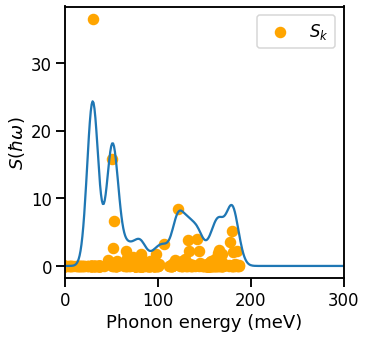

In [54]:
#partial HR function
plt.figure(figsize=(5, 5))
plt.plot(p.S_omega)
data=np.loadtxt("table.dat")
plt.scatter(data[:,1]*1000, data[:,0]*100, color="orange", s=100, label="$S_k$")

plt.ylabel('$S(\hbar\omega)$')
plt.xlabel('Phonon energy (meV)')
plt.xlim(0, 300)
# plt.ylim(0, 0.01)
plt.savefig('S_omega', bbox_inches='tight')
p.write_S('S')
plt.legend()
plt.show()

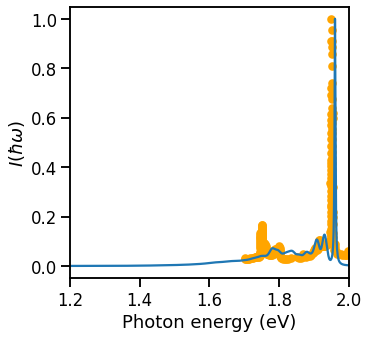

In [58]:
A, I = p.PL(2, 2, 1.96)
plt.figure(figsize=(5, 5))
plt.plot(I.__abs__()/I.__abs__().max())
# normalize intensity the intensity to one
data=np.loadtxt("EXP_PL.dat")

plt.scatter(data[:,0]*1000, data[:,1]/np.amax(data[:,1]), color="orange", s=50, label="EXP PL" )
plt.ylabel('$I(\hbar\omega)$')
plt.xlabel('Photon energy (eV)')
plt.xlim(1200, 2000)
x_values, labels = plt.xticks()
labels = [float(x)/p.resolution for x in x_values]
plt.xticks(x_values, labels)
#plt.ylim(0, 600)
plt.savefig('I', bbox_inches='tight')
plt.show()